In [1]:
# system
import os
import importlib

# scipy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

# nutrig
import flt.FLT_0
from flt.FLT_0 import *

#plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

%matplotlib inline

In [14]:
importlib.reload(flt.FLT_0)
from flt.FLT_0 import *

In [3]:
test_file = '/sps/grand/pcorrea/nutrig/database/sig/zhaires_proton_rfv2_th1_35_th2_25/sim_plus_noise_GP300_Xi_Sib_Proton_0.134_77.6_305.0_21274_seed_3678.npz'
test_file = '/sps/grand/pcorrea/nutrig/database/sig/zhaires_proton_rfv2_th1_55_th2_35/sim_plus_noise_GP300_Xi_Sib_Proton_0.874_74.4_210.4_1472_seed_8442.npz'
du_idx    = 180#85

with np.load(test_file) as f:
    for key in f.files:
        print(key)
    trace = f['traces'][du_idx]

traces
snr
inj_pulse_times
pretrig_flags
pretrig_times
shower_core_pos
xmax_pos_shc
du_ids
du_xyz
du_seconds
du_nanoseconds
omega
omega_c
energy
zenith
azimuth
noise_file
noise_file_entries


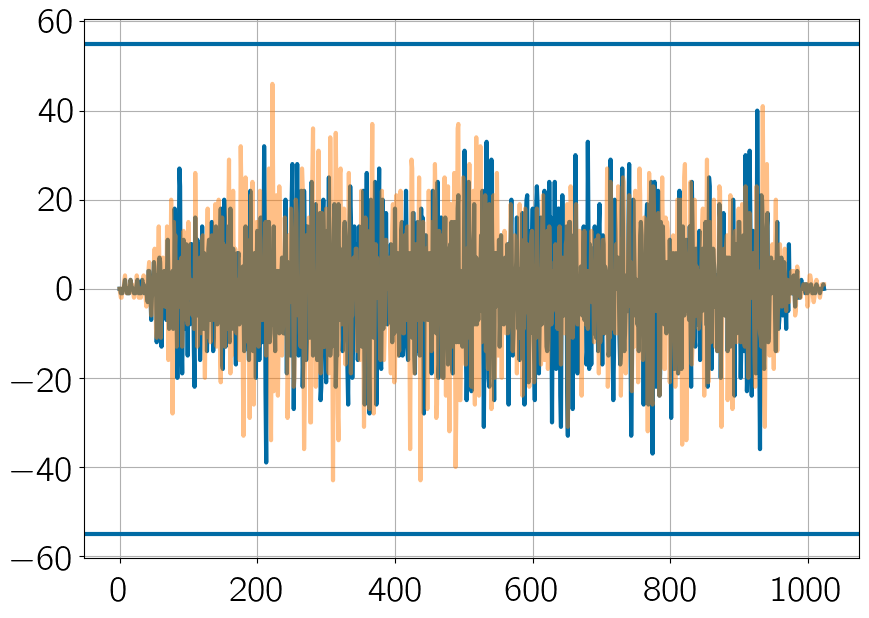

In [4]:
plt.plot(trace[0])
plt.plot(trace[1],alpha=.5)
plt.axhline(55)
plt.axhline(-55)
#plt.axvline(227,alpha=.5)
plt.show()

In [5]:
flt_0 = FLT0()
flt_0.set_trigger_config({'t_quiet':256}) # In an offline analysis it's a bit hard to predict what comes before
flt_0.trigger_config

{'t_quiet': 256,
 't_period': 512,
 't_sepmax': 20,
 'nc_min': 2,
 'nc_max': 8,
 'q_min': 0,
 'q_max': 255,
 'th1': 35,
 'th2': 25,
 't_pretrig': 960,
 't_overlap': 64,
 't_posttrig': 1024}

In [6]:
flt0_results = flt_0.trigger(trace)

2024-10-09 11:39:32,450 [MainThread  ] [DEBUG  ]  channel 0
2024-10-09 11:39:32,451 [MainThread  ] [DEBUG  ]  NC = 1 is too large/small
2024-10-09 11:39:32,452 [MainThread  ] [DEBUG  ]  channel 1
2024-10-09 11:39:32,452 [MainThread  ] [DEBUG  ]  NC = 1 is too large/small


In [7]:
flt0_results

{'trigger_flags_ch': array([False, False, False]), 'trigger_time': -1}

In [8]:
flt0_results['trigger_time'] - flt_0.trigger_config['t_period'] // 2 - flt_0.trigger_config['t_overlap'] // 2

-289

## Test on a signal event

In [4]:
# test_file = '/sps/grand/pcorrea/nutrig/database/sig/zhaires_proton_rfv2_th1_55_th2_35/sim_plus_noise_GP300_Xi_Sib_Proton_3.01_64.1_73.86_21428_seed_11544.npz'
# test_file = '/sps/grand/pcorrea/nutrig/database/sig/zhaires_proton_rfv2_th1_55_th2_35/sim_plus_noise_GP300_Xi_Sib_Proton_0.874_74.4_210.4_1472_seed_8442.npz'
test_file = '/sps/grand/pcorrea/nutrig/database/sig/zhaires_proton_rfv2_th1_55_th2_35/sim_plus_noise_GP300_Xi_Sib_Proton_0.315_77.2_291.8_16584_seed_5875.npz'
#test_file = '/sps/grand/pcorrea/nutrig/database/sig/zhaires_proton_rfv2_th1_55_th2_35/sim_plus_noise_GP300_Xi_Sib_Proton_0.441_85.3_347.1_3246_seed_6728.npz'
#test_file = '/sps/grand/pcorrea/nutrig/database/sig/zhaires_proton_rfv2_th1_55_th2_35/sim_plus_noise_GP300_Xi_Sib_Proton_3.92_84.7_238.9_8408_seed_12215.npz'

with np.load(test_file) as f:
    traces = f['traces']
    du_xyz = f['du_xyz']
    shower_core_pos = f['shower_core_pos']
    pretrig_flags = f['pretrig_flags']
    energy = f['energy']
    zenith = f['zenith']
    azimuth = f['azimuth']

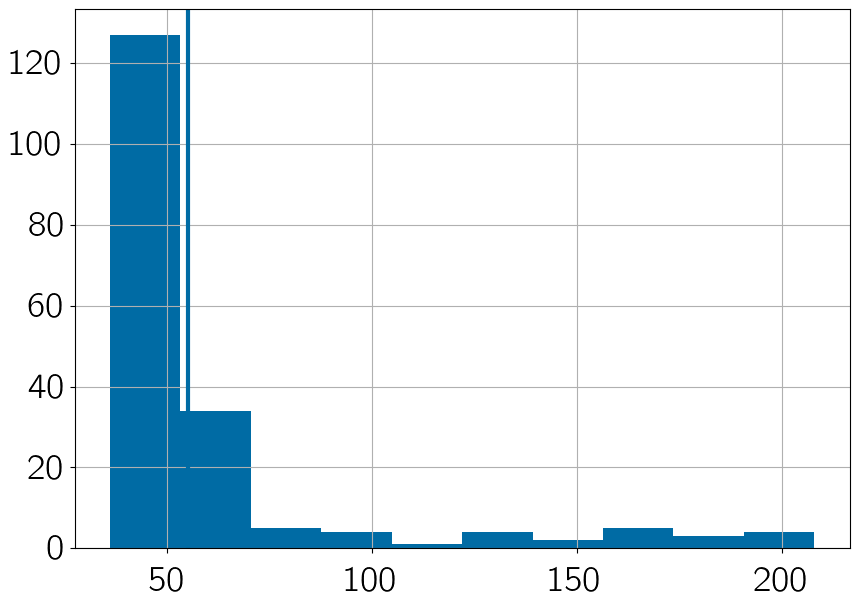

In [5]:
mask_flt0_original = np.where(pretrig_flags>0)
max_traces         = np.max( np.abs(traces[:,:2]),axis=(1,2) )

plt.hist(max_traces)
plt.axvline(55)
plt.show()

In [9]:
importlib.reload(flt.FLT_0)
from flt.FLT_0 import *

flt_0 = FLT0()
flt_0.set_trigger_config({'t_quiet':100,'th1':55,'th2':35,'nc_max':20,'t_sepmax':50}) # In an offline analysis it's a bit hard to predict what comes before
flt_0.trigger_config

{'t_quiet': 100,
 't_period': 512,
 't_sepmax': 50,
 'nc_min': 2,
 'nc_max': 20,
 'q_min': 0,
 'q_max': 255,
 'th1': 55,
 'th2': 35,
 't_pretrig': 960,
 't_overlap': 64,
 't_posttrig': 1024}

2024-10-10 11:42:17,401 [MainThread  ] [DEBUG  ]  0
2024-10-10 11:42:17,402 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:17,402 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,403 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,403 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,404 [MainThread  ] [DEBUG  ]  1
2024-10-10 11:42:17,404 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:17,405 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,406 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,406 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,407 [MainThread  ] [DEBUG  ]  2
2024-10-10 11:42:17,407 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:17,408 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,408 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,409 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,410 [MainThread  ] [DEBUG  ]  3
2024-10-10 11:42:17,410 [MainThread  ] [DE

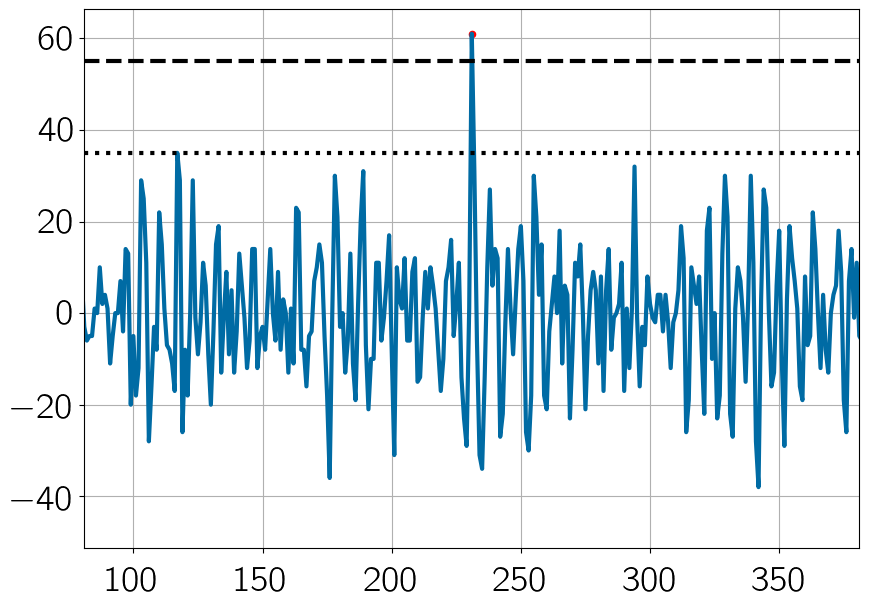

2024-10-10 11:42:17,701 [MainThread  ] [DEBUG  ]  25
2024-10-10 11:42:17,701 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:17,702 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,703 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,703 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,704 [MainThread  ] [DEBUG  ]  26
2024-10-10 11:42:17,704 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:17,705 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,705 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,706 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,706 [MainThread  ] [DEBUG  ]  27
2024-10-10 11:42:17,707 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:17,707 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,708 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,708 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,709 [MainThread  ] [DEBUG  ]  28
2024-10-10 11:42:17,709 [MainThread  ]

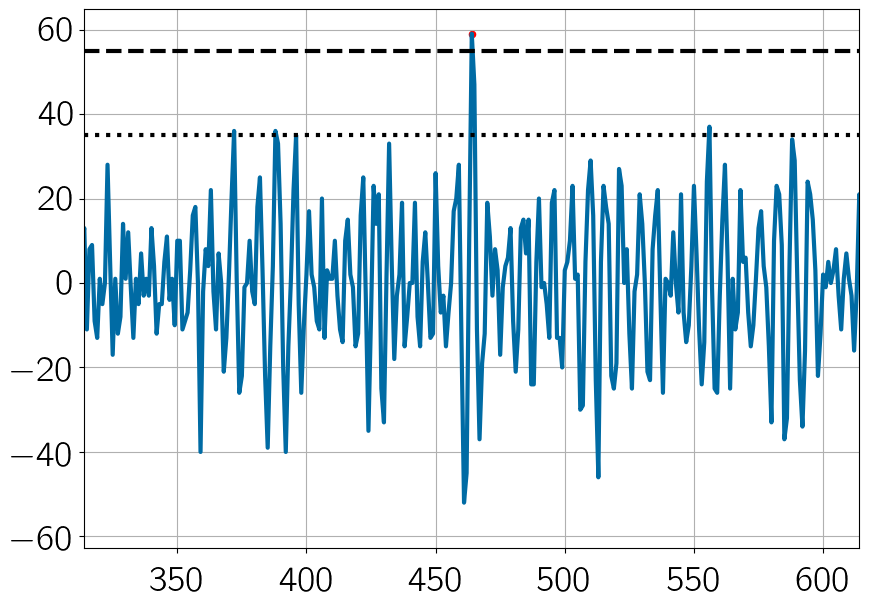

2024-10-10 11:42:17,922 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,923 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,923 [MainThread  ] [DEBUG  ]  33
2024-10-10 11:42:17,923 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:17,924 [MainThread  ] [DEBUG  ]  Found a trigger!
2024-10-10 11:42:17,924 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,925 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,925 [MainThread  ] [DEBUG  ]  34
2024-10-10 11:42:17,925 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:17,926 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,926 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,926 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,927 [MainThread  ] [DEBUG  ]  35
2024-10-10 11:42:17,927 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:17,927 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:17,928 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:17,928 [Main

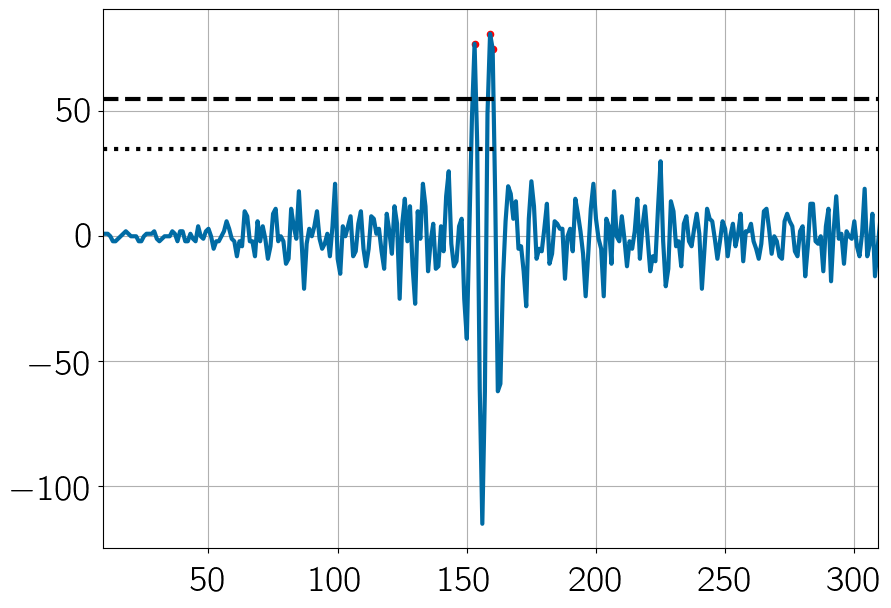

2024-10-10 11:42:18,108 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,109 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,109 [MainThread  ] [DEBUG  ]  40
2024-10-10 11:42:18,110 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,110 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,110 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,111 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,111 [MainThread  ] [DEBUG  ]  41
2024-10-10 11:42:18,111 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,112 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,112 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,112 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,113 [MainThread  ] [DEBUG  ]  42
2024-10-10 11:42:18,113 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,113 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,114 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,114 [MainTh

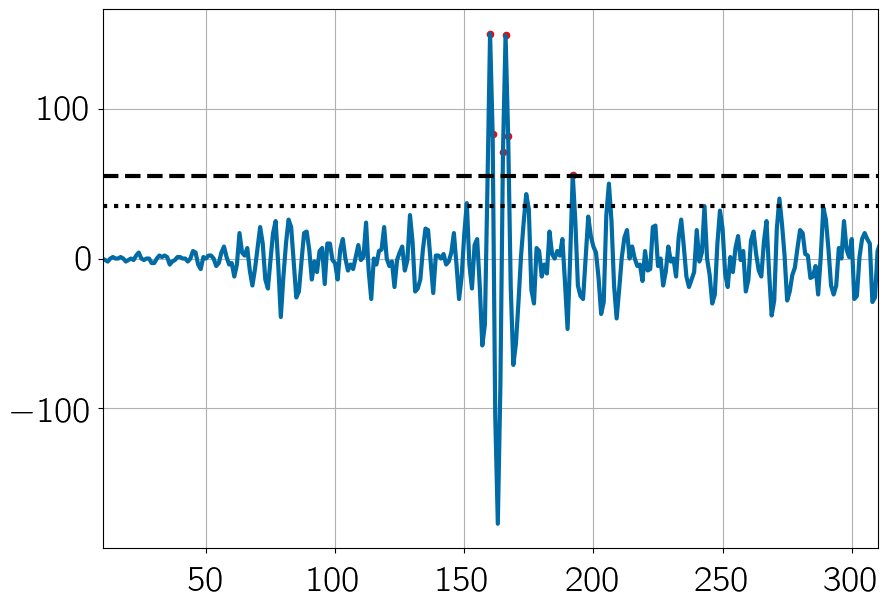

2024-10-10 11:42:18,319 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,320 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 320 ns.


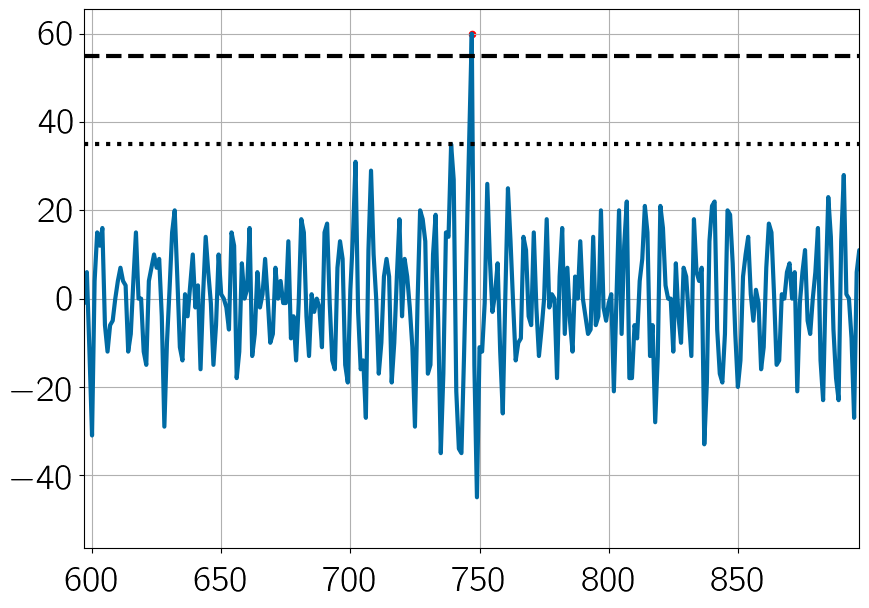

2024-10-10 11:42:18,525 [MainThread  ] [DEBUG  ]  58
2024-10-10 11:42:18,526 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,526 [MainThread  ] [DEBUG  ]  Found a trigger!
2024-10-10 11:42:18,527 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,527 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,527 [MainThread  ] [DEBUG  ]  59
2024-10-10 11:42:18,528 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,528 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,528 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,529 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,529 [MainThread  ] [DEBUG  ]  60
2024-10-10 11:42:18,529 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,530 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,530 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,531 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,531 [MainThread  ] [DEBUG  ]  61
2024-10-10 11:42:18,531 [MainThread 

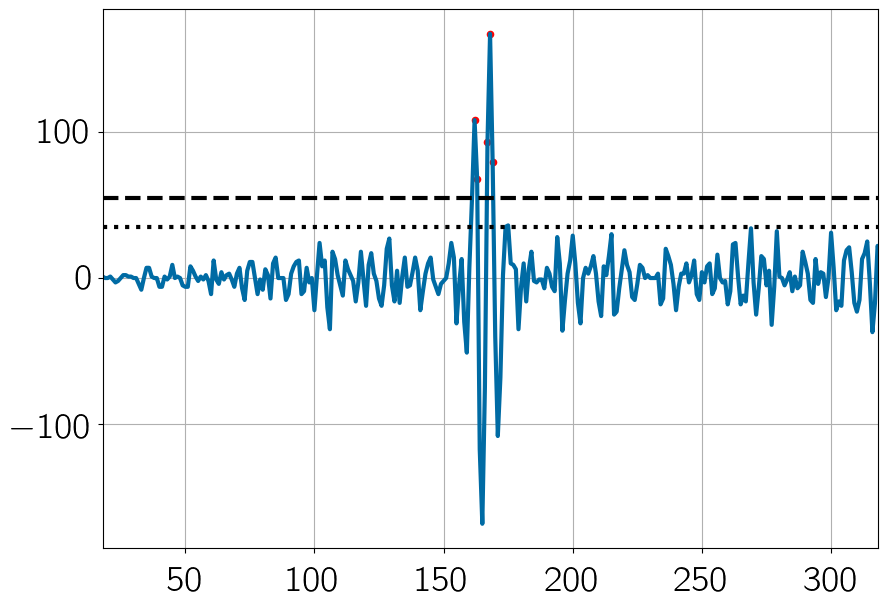

2024-10-10 11:42:18,699 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,699 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,700 [MainThread  ] [DEBUG  ]  65
2024-10-10 11:42:18,700 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,700 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,701 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,701 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,701 [MainThread  ] [DEBUG  ]  66
2024-10-10 11:42:18,702 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,702 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,702 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,703 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,703 [MainThread  ] [DEBUG  ]  67
2024-10-10 11:42:18,703 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,704 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,704 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,704 [MainTh

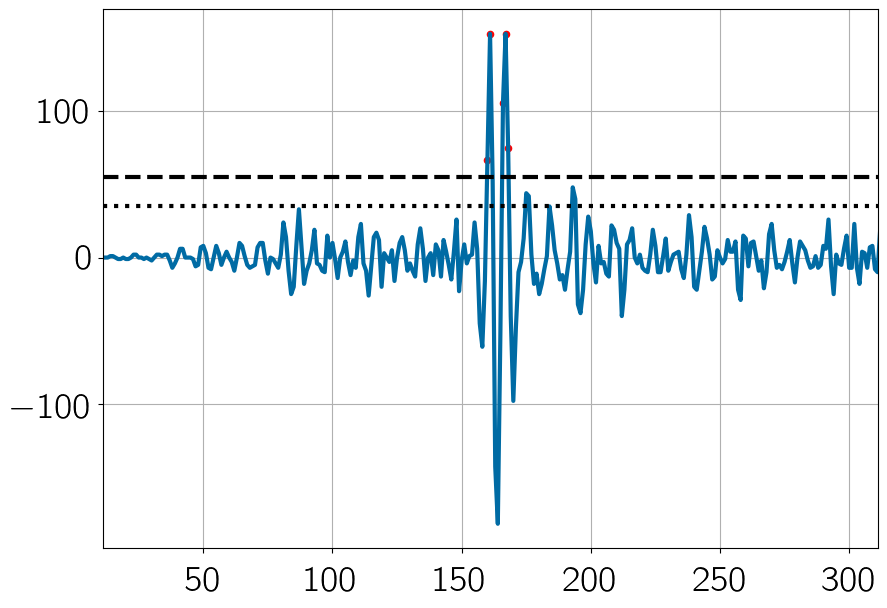

2024-10-10 11:42:18,871 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,872 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,873 [MainThread  ] [DEBUG  ]  71
2024-10-10 11:42:18,873 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,874 [MainThread  ] [DEBUG  ]  Found a trigger!
2024-10-10 11:42:18,874 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:18,874 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:18,875 [MainThread  ] [DEBUG  ]  72
2024-10-10 11:42:18,875 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:18,875 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 378 ns.


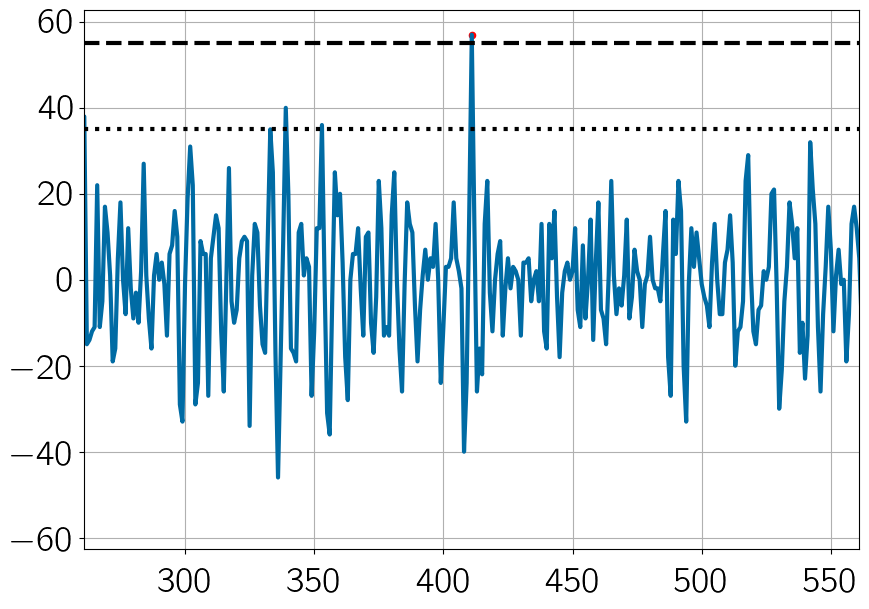

2024-10-10 11:42:19,090 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,091 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,091 [MainThread  ] [DEBUG  ]  73
2024-10-10 11:42:19,091 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,092 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,092 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,093 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,093 [MainThread  ] [DEBUG  ]  74
2024-10-10 11:42:19,094 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,094 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,094 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,095 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,095 [MainThread  ] [DEBUG  ]  75
2024-10-10 11:42:19,095 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,096 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,096 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,096 [MainTh

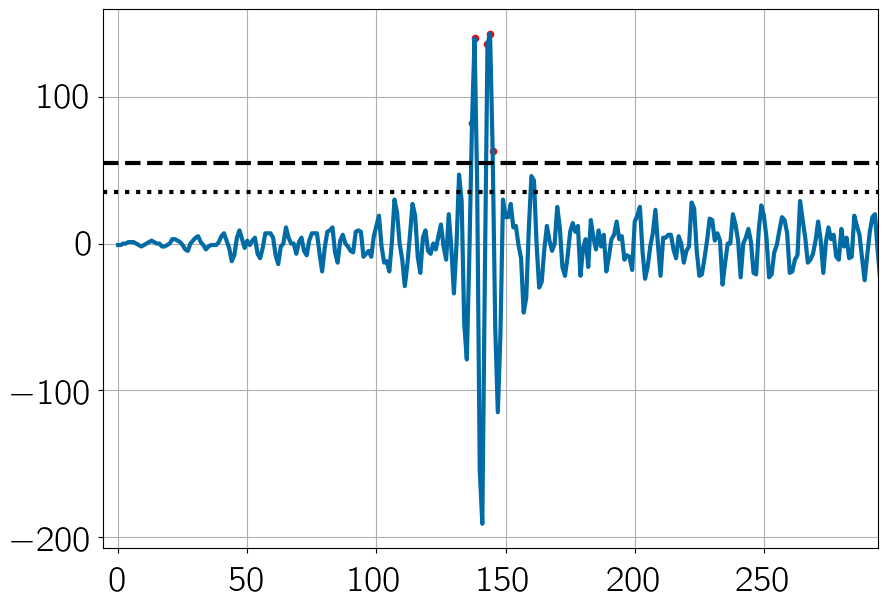

2024-10-10 11:42:19,355 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,356 [MainThread  ] [DEBUG  ]  Found a trigger!
2024-10-10 11:42:19,356 [MainThread  ] [DEBUG  ]  78
2024-10-10 11:42:19,356 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,357 [MainThread  ] [DEBUG  ]  Found a trigger!
2024-10-10 11:42:19,357 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,358 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,358 [MainThread  ] [DEBUG  ]  79
2024-10-10 11:42:19,358 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,359 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,359 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,360 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,360 [MainThread  ] [DEBUG  ]  80
2024-10-10 11:42:19,360 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,361 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,361 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,361 [Ma

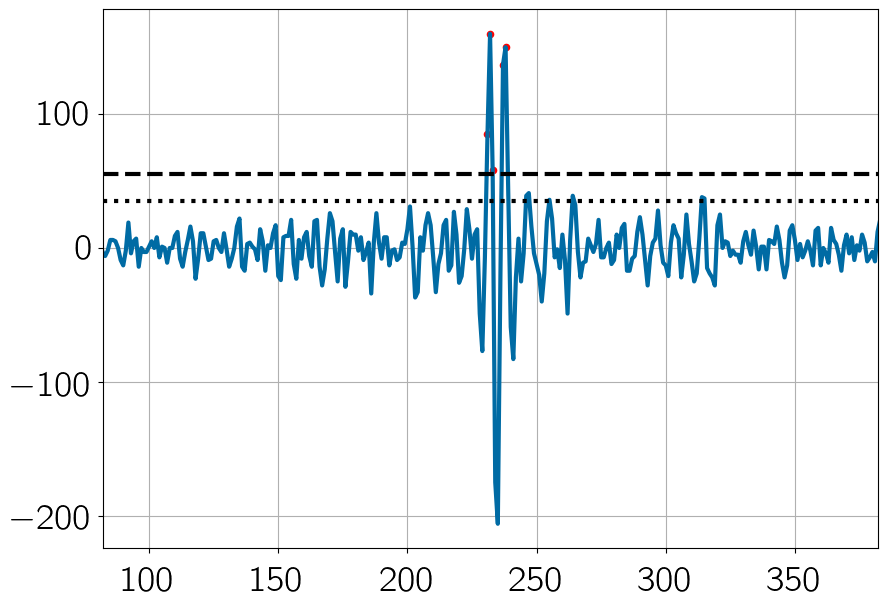

2024-10-10 11:42:19,532 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,533 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 102 ns.


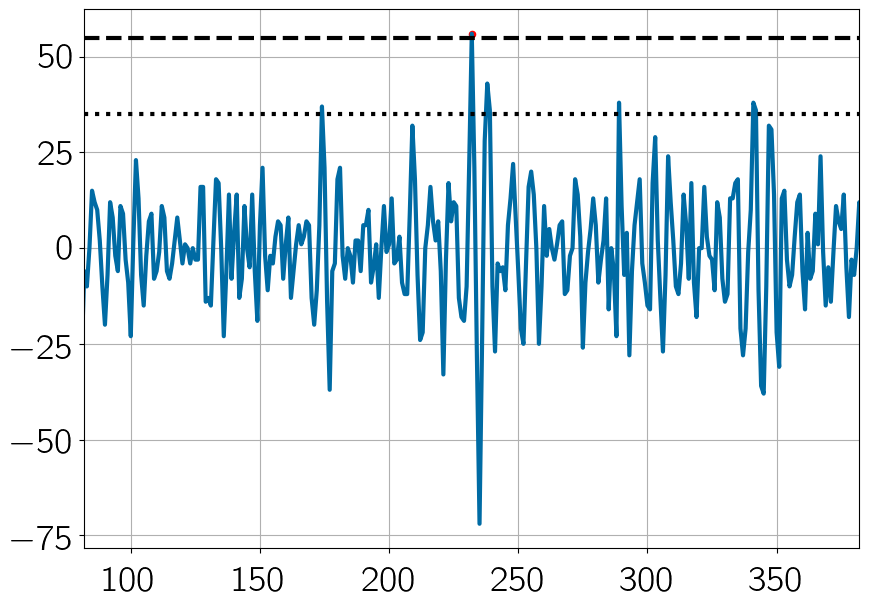

2024-10-10 11:42:19,731 [MainThread  ] [DEBUG  ]  85
2024-10-10 11:42:19,731 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,732 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 160 ns.


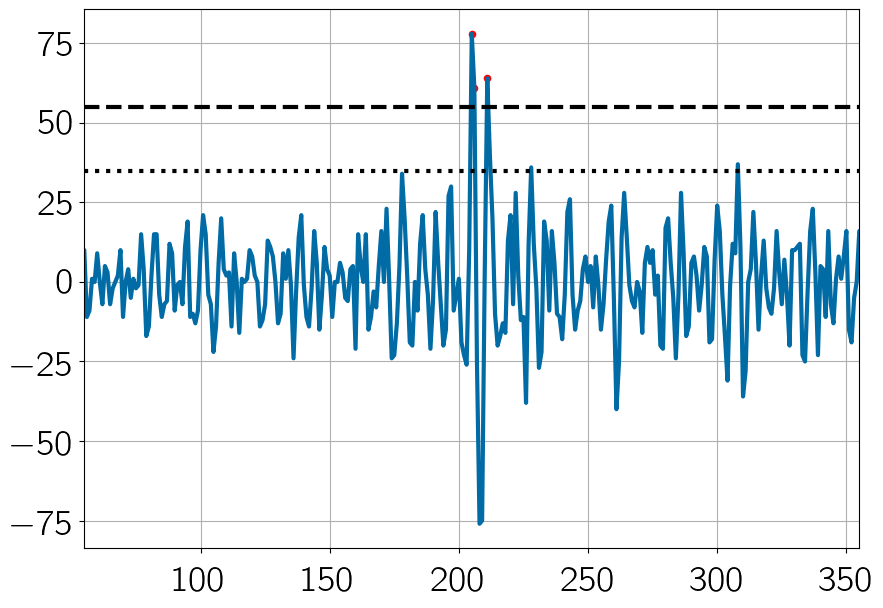

2024-10-10 11:42:19,941 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,941 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,942 [MainThread  ] [DEBUG  ]  86
2024-10-10 11:42:19,942 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,943 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,943 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,943 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,944 [MainThread  ] [DEBUG  ]  87
2024-10-10 11:42:19,944 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,944 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,945 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,946 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,946 [MainThread  ] [DEBUG  ]  88
2024-10-10 11:42:19,946 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:19,947 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:19,947 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:19,948 [MainTh

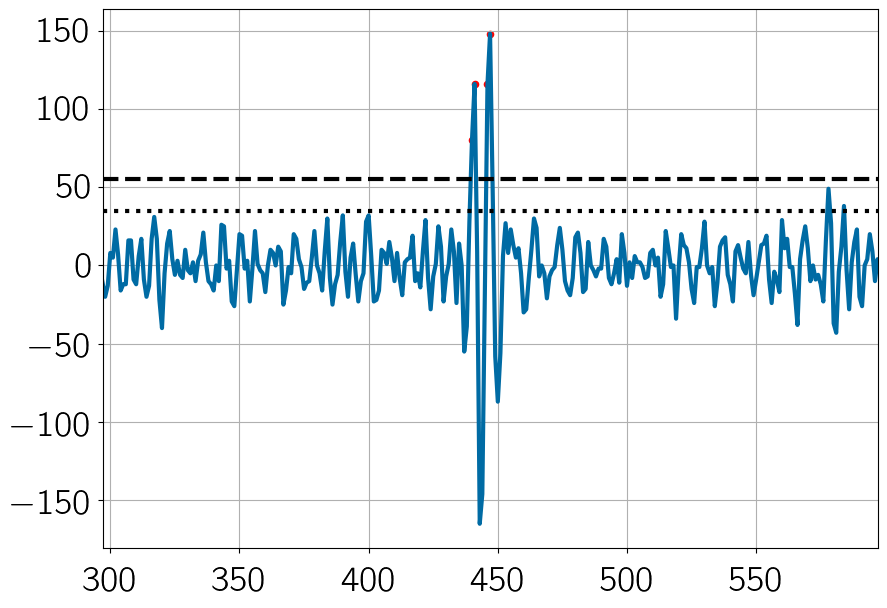

2024-10-10 11:42:20,162 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:20,162 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,163 [MainThread  ] [DEBUG  ]  91
2024-10-10 11:42:20,163 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:20,164 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 82 ns.


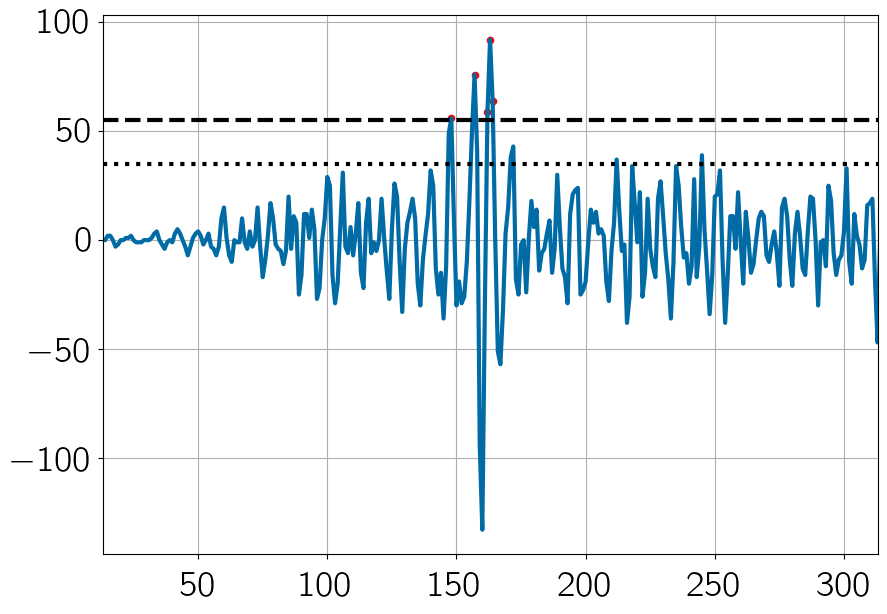

2024-10-10 11:42:20,341 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:20,341 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 380 ns.


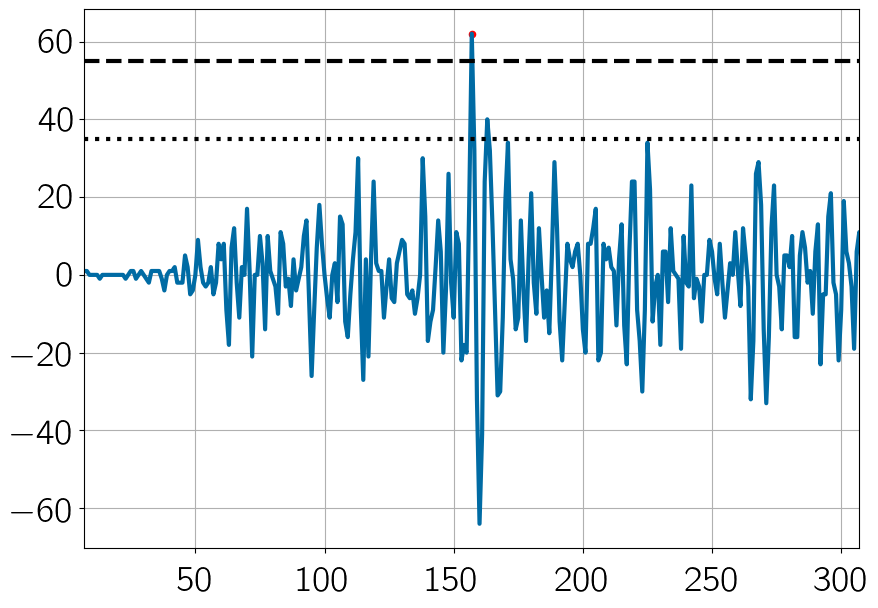

2024-10-10 11:42:20,553 [MainThread  ] [DEBUG  ]  92
2024-10-10 11:42:20,554 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:20,554 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,554 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:20,555 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 436 ns.


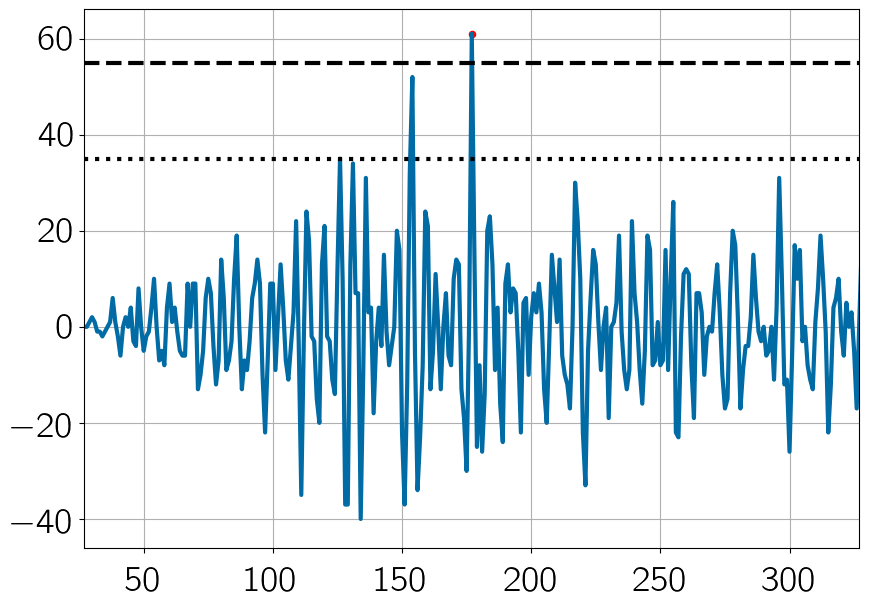

2024-10-10 11:42:20,757 [MainThread  ] [DEBUG  ]  93
2024-10-10 11:42:20,758 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:20,758 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,759 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:20,759 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,759 [MainThread  ] [DEBUG  ]  94
2024-10-10 11:42:20,760 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:20,760 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,761 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:20,761 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,762 [MainThread  ] [DEBUG  ]  95
2024-10-10 11:42:20,762 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:20,762 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,763 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:20,763 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,763 [MainThread  ] [DEBUG  ]  96
2024-10-10 11:42:20,764 [MainThread  ]

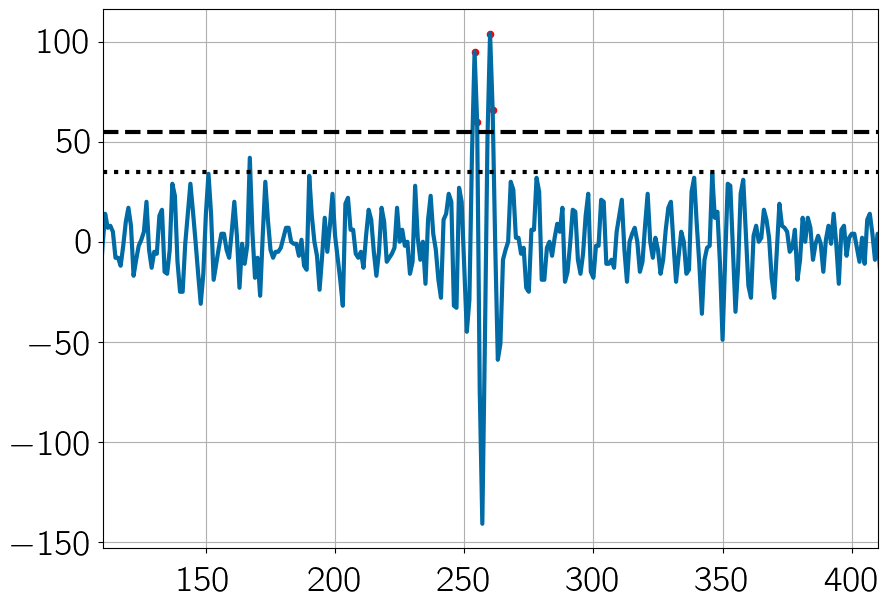

2024-10-10 11:42:20,960 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:20,961 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,961 [MainThread  ] [DEBUG  ]  104
2024-10-10 11:42:20,962 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:20,963 [MainThread  ] [DEBUG  ]  NC = 1 is too large/small
2024-10-10 11:42:20,963 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:20,963 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,964 [MainThread  ] [DEBUG  ]  105
2024-10-10 11:42:20,964 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:20,964 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,964 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:20,965 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,965 [MainThread  ] [DEBUG  ]  106
2024-10-10 11:42:20,965 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:20,966 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:20,966 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:

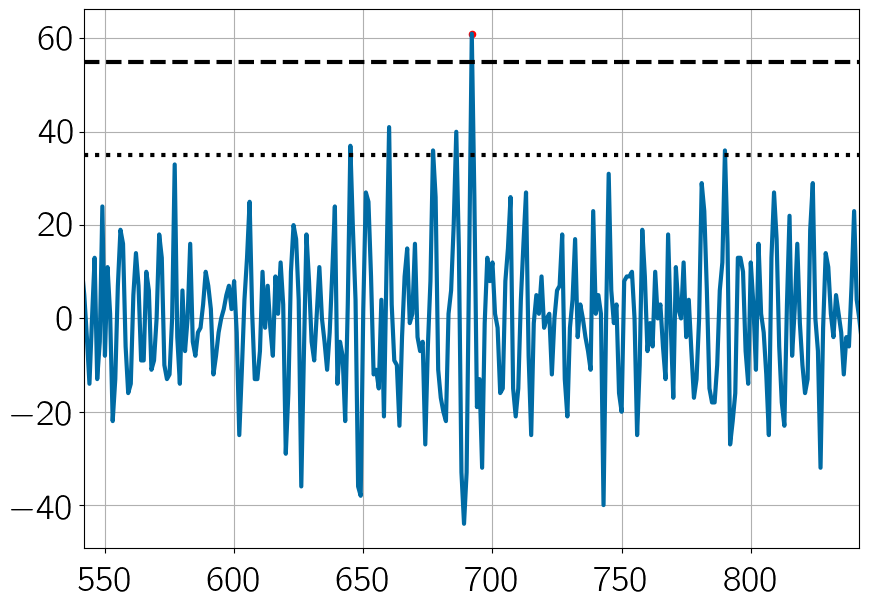

2024-10-10 11:42:21,175 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,175 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,176 [MainThread  ] [DEBUG  ]  108
2024-10-10 11:42:21,176 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,177 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,177 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,177 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,178 [MainThread  ] [DEBUG  ]  109
2024-10-10 11:42:21,178 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,178 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,179 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,179 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,179 [MainThread  ] [DEBUG  ]  110
2024-10-10 11:42:21,180 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,180 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,180 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,181 [Mai

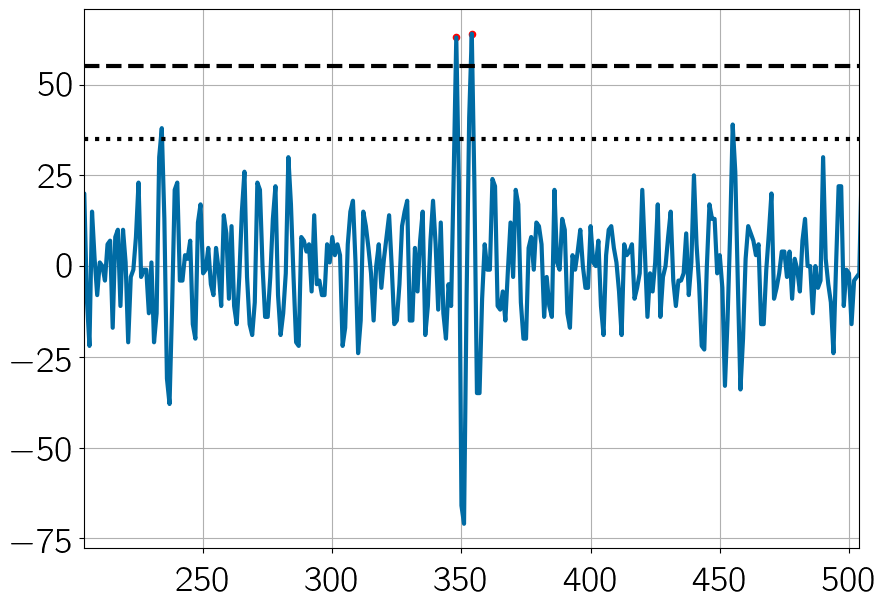

2024-10-10 11:42:21,400 [MainThread  ] [DEBUG  ]  112
2024-10-10 11:42:21,401 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,402 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 152 ns.


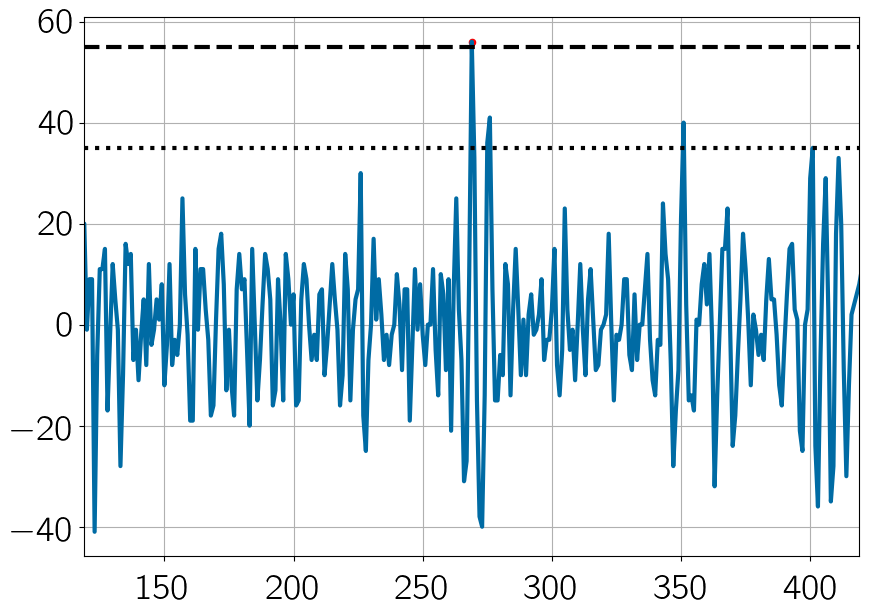

2024-10-10 11:42:21,615 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,616 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,616 [MainThread  ] [DEBUG  ]  113
2024-10-10 11:42:21,617 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,617 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,617 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,618 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,618 [MainThread  ] [DEBUG  ]  114
2024-10-10 11:42:21,618 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,619 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,619 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,620 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,620 [MainThread  ] [DEBUG  ]  115
2024-10-10 11:42:21,620 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,621 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,621 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,621 [Mai

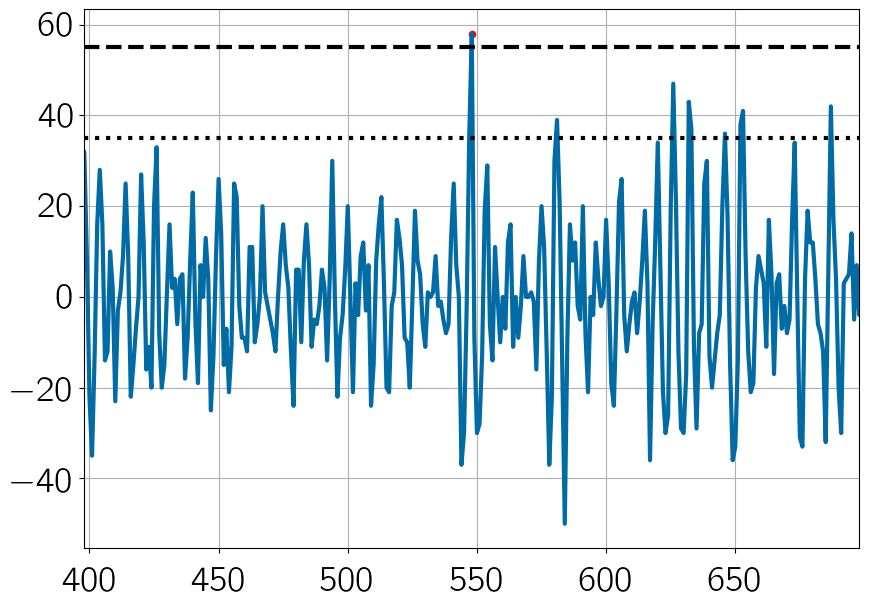

2024-10-10 11:42:21,839 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,839 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,840 [MainThread  ] [DEBUG  ]  120
2024-10-10 11:42:21,840 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,841 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,841 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,841 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,842 [MainThread  ] [DEBUG  ]  121
2024-10-10 11:42:21,842 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,843 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,843 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,844 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,844 [MainThread  ] [DEBUG  ]  122
2024-10-10 11:42:21,844 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:21,845 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:21,845 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:21,845 [Mai

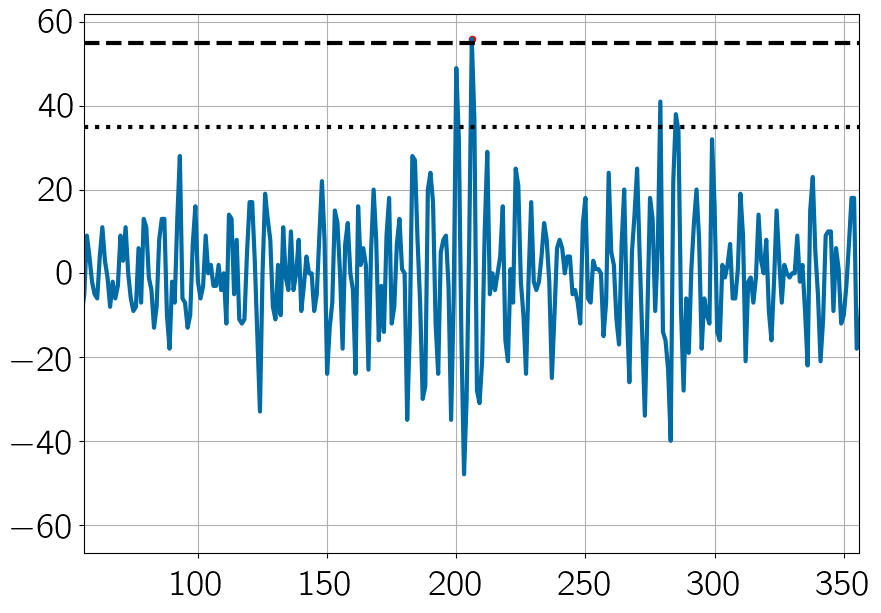

2024-10-10 11:42:22,090 [MainThread  ] [DEBUG  ]  143
2024-10-10 11:42:22,091 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,091 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,092 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,092 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,092 [MainThread  ] [DEBUG  ]  144
2024-10-10 11:42:22,093 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,093 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,093 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,094 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,094 [MainThread  ] [DEBUG  ]  145
2024-10-10 11:42:22,094 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,095 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,096 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,096 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,096 [MainThread  ] [DEBUG  ]  146
2024-10-10 11:42:22,097 [MainThrea

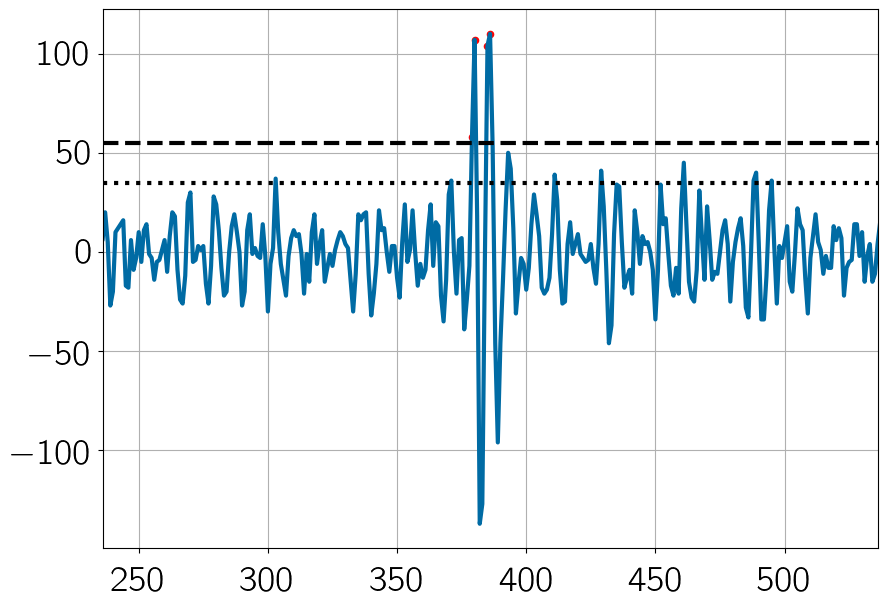

2024-10-10 11:42:22,301 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,302 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 304 ns.


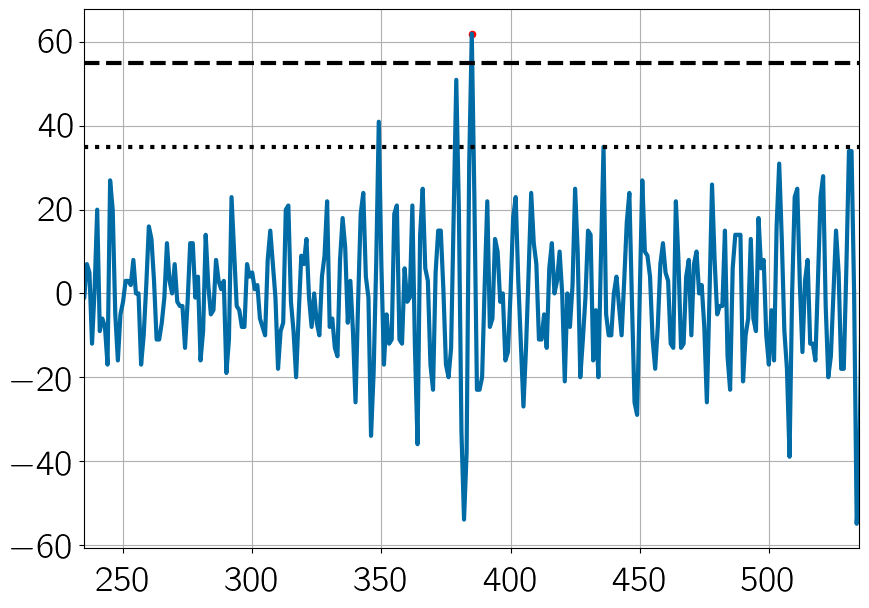

2024-10-10 11:42:22,521 [MainThread  ] [DEBUG  ]  156
2024-10-10 11:42:22,522 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,522 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,523 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,523 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,523 [MainThread  ] [DEBUG  ]  157
2024-10-10 11:42:22,524 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,524 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,525 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,525 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,525 [MainThread  ] [DEBUG  ]  158
2024-10-10 11:42:22,526 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,527 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 226 ns.


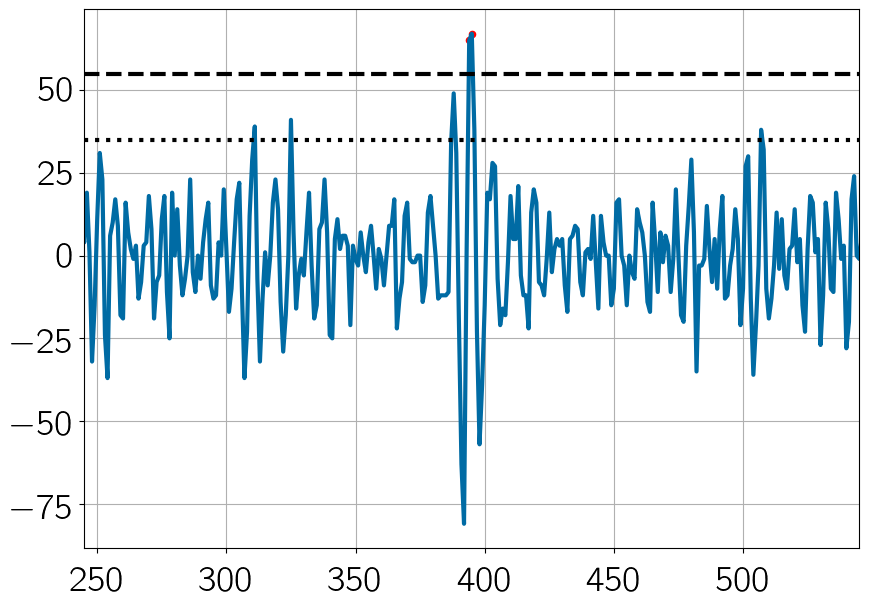

2024-10-10 11:42:22,732 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,732 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,733 [MainThread  ] [DEBUG  ]  159
2024-10-10 11:42:22,733 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,733 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,734 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,734 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,734 [MainThread  ] [DEBUG  ]  160
2024-10-10 11:42:22,735 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,735 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,735 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,737 [MainThread  ] [DEBUG  ]  NC = 1 is too large/small
2024-10-10 11:42:22,737 [MainThread  ] [DEBUG  ]  161
2024-10-10 11:42:22,737 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,738 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 302 ns.


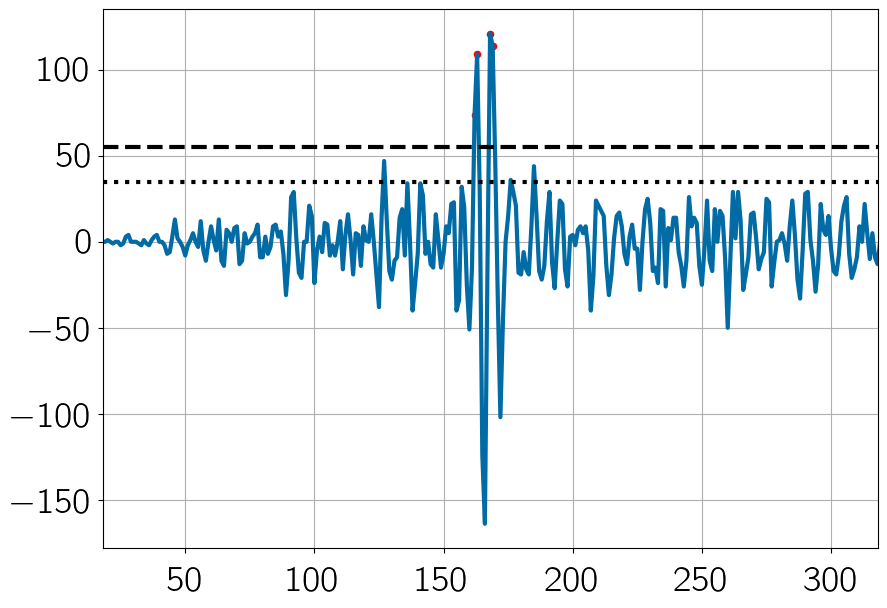

2024-10-10 11:42:22,928 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,928 [MainThread  ] [DEBUG  ]  Found a trigger!
2024-10-10 11:42:22,929 [MainThread  ] [DEBUG  ]  162
2024-10-10 11:42:22,929 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,930 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,930 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,931 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,931 [MainThread  ] [DEBUG  ]  163
2024-10-10 11:42:22,931 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,932 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,932 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:22,932 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:22,933 [MainThread  ] [DEBUG  ]  164
2024-10-10 11:42:22,933 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:22,934 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 50 ns.


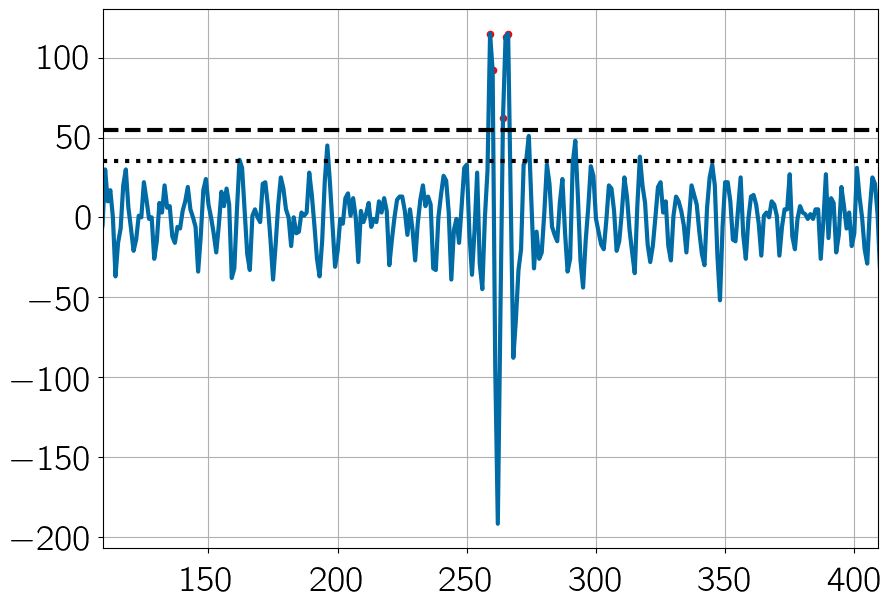

2024-10-10 11:42:23,136 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,137 [MainThread  ] [ERROR  ]  Violating Tsepmax, the separation is 242 ns.


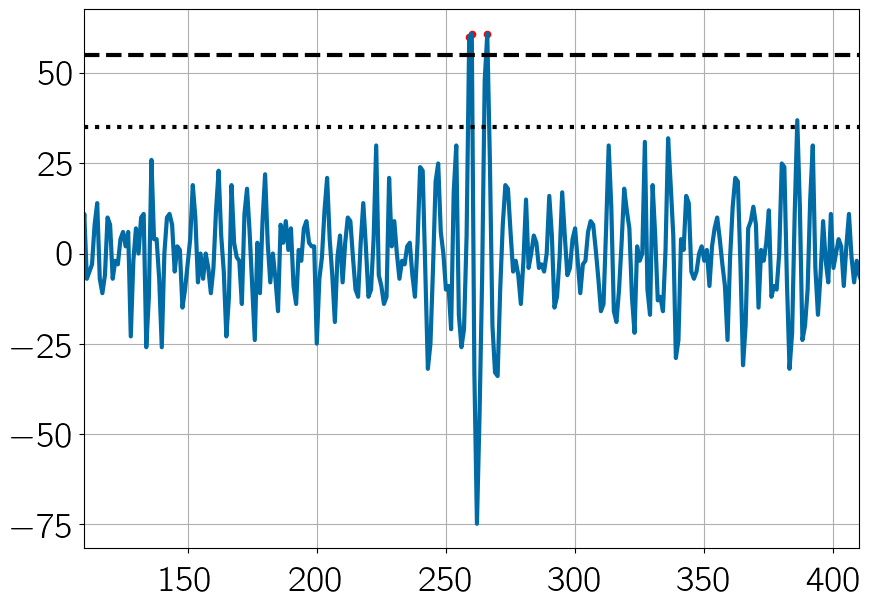

2024-10-10 11:42:23,349 [MainThread  ] [DEBUG  ]  165
2024-10-10 11:42:23,350 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:23,351 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,351 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,351 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,352 [MainThread  ] [DEBUG  ]  166
2024-10-10 11:42:23,352 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:23,353 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,353 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,354 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,354 [MainThread  ] [DEBUG  ]  167
2024-10-10 11:42:23,355 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:23,355 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,356 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,356 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,356 [MainThread  ] [DEBUG  ]  168
2024-10-10 11:42:23,357 [MainThrea

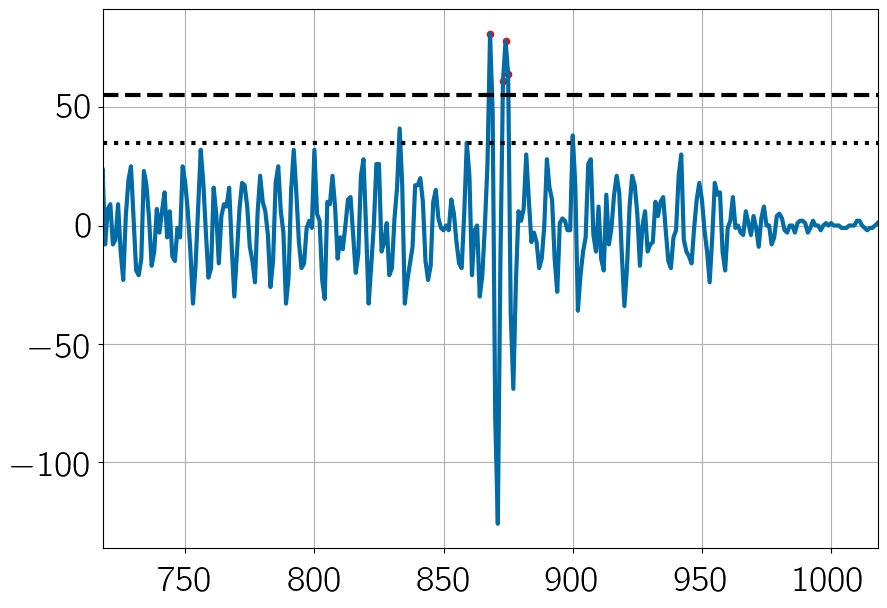

2024-10-10 11:42:23,560 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,561 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,561 [MainThread  ] [DEBUG  ]  169
2024-10-10 11:42:23,562 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:23,562 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,563 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,563 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,564 [MainThread  ] [DEBUG  ]  170
2024-10-10 11:42:23,564 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:23,565 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,565 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,566 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,566 [MainThread  ] [DEBUG  ]  171
2024-10-10 11:42:23,566 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:23,567 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,567 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,569 [Mai

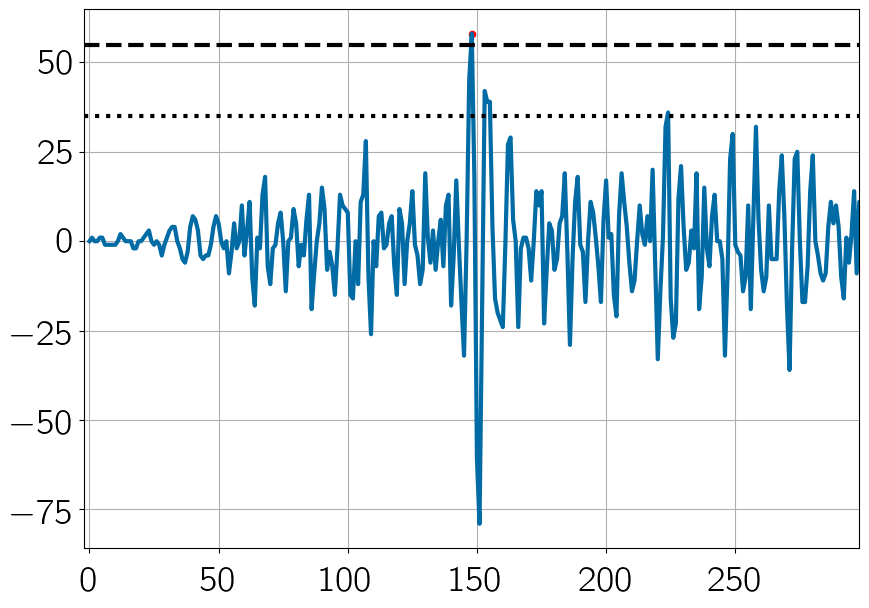

2024-10-10 11:42:23,792 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,793 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,793 [MainThread  ] [DEBUG  ]  188
2024-10-10 11:42:23,793 [MainThread  ] [DEBUG  ]  channel 0
2024-10-10 11:42:23,794 [MainThread  ] [ERROR  ]  No T1 crossing
2024-10-10 11:42:23,794 [MainThread  ] [DEBUG  ]  channel 1
2024-10-10 11:42:23,795 [MainThread  ] [ERROR  ]  No T1 crossing


In [10]:
mask_flt0_new = np.zeros(traces.shape[0],dtype=bool)
for i, trace in enumerate(traces):
    logger.debug(i)
    flt0_results = flt_0.trigger(trace)
    mask_flt0_new[i] = np.any(flt0_results['trigger_flags_ch'])

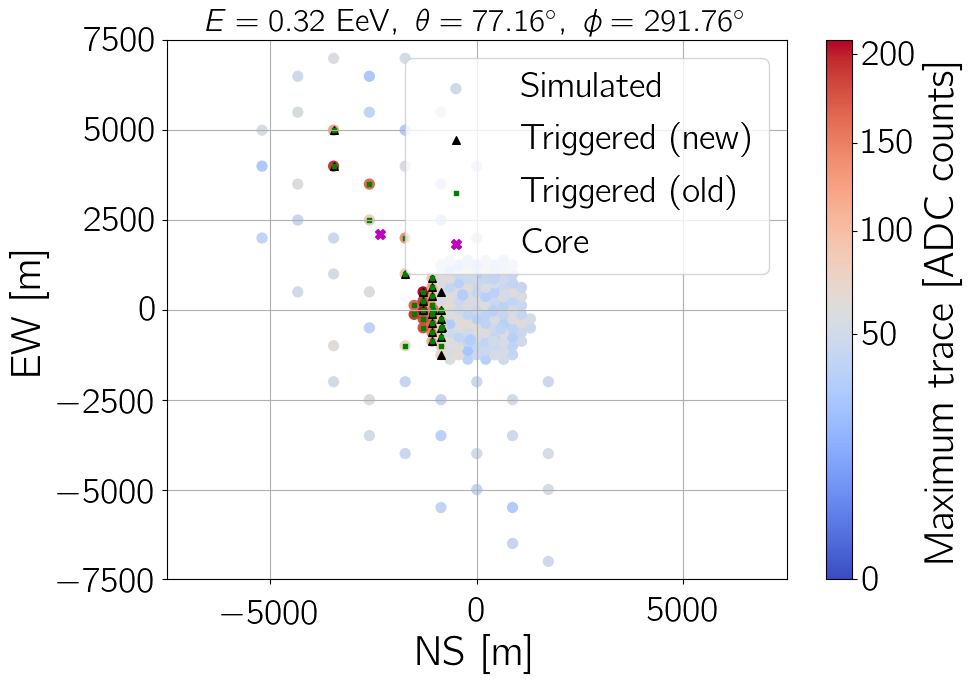

In [8]:
s = plt.scatter(du_xyz[:,0],du_xyz[:,1],s=50,c=max_traces,cmap='coolwarm',norm=colors.TwoSlopeNorm(vmin=0., vcenter=flt_0.trigger_config['th1'], vmax=np.max(max_traces)),label='Simulated')
plt.colorbar(s,label='Maximum trace [ADC counts]')
plt.scatter(du_xyz[:,0][mask_flt0_new],du_xyz[:,1][mask_flt0_new],marker='^',color='k',s=30,label='Triggered (new)')
plt.scatter(du_xyz[:,0][mask_flt0_original],du_xyz[:,1][mask_flt0_original],marker='s',color='g',label='Triggered (old)')
plt.scatter(shower_core_pos[0],shower_core_pos[1],marker='X',s=50,color='m',label='Core')
plt.xlim([-7500,7500])
plt.ylim([-7500,7500])
plt.xlabel('NS [m]')
plt.ylabel('EW [m]')
plt.title(rf'$ E = {energy/1e9:.2f}~ {{\rm EeV}},~ \theta = {zenith:.2f}^\circ,~ \phi = {azimuth:.2f}^\circ$',fontsize=23)
plt.legend(frameon=True)
plt.show()